In [1]:
import sys
sys.path.append("../")
import numpy as np 
from utils import *
from lattice import *
import pandas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import tensornetwork as tn

In [2]:
A = FF.block1D(2, 2, 2, seed=0).real
tmp = np.zeros((2,2))
for i in range(2):
    tmp += A[:,i,:] @ A[:,i,:].T
print(tmp)

[[ 1.0000000e+00 -4.4408921e-16]
 [-4.4408921e-16  1.0000000e+00]]


In [11]:
sps = 3
bd = 2
res = []
for seed in range(0, 5000):
    parent_dir = f"../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_{seed}/1_mel_Adam/lr_0.001_epoch_10000"
    try:
        u_path, lv = path_with_lowest_loss(parent_dir)
        u = np.load(u_path + "/u/0.npy")
    except:
        print(f"there are no matrix under the path = {parent_dir}")
        continue
    print(u_path)
    A = FF.block1D(bd, sps, bd, seed=seed)
    A_ = A.transpose(1,0,2)
    A_tilde = np.einsum("ijk,ilm->jlkm", A_, A_).reshape(4,4)
    sle = np.sort(np.linalg.eigvals(A_tilde))[::-1]
    print(sle.real)
    A2 = np.einsum("ijk,klm->jlim", A, A).reshape(sps**2, bd**2)
    U, s , V = np.linalg.svd(A2)
    Up = U[:, len(s):]
    h = Up @ Up.T
    max_gap = 0
    for L in range(4,5):
        H = sum_ham(h, [[i, (i + 1) % L] for i in range(L)], L, sps)
        E = np.linalg.eigvalsh(H)
        gap = E[1] - E[0]
        max_gap = max(gap, max_gap)
#         print(max_gap, seed)
    e = np.linalg.eigvalsh(h)
    h = np.load(f"../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_{seed}/1_mel_Adam/lr_0.001_epoch_10000/H/0.npy")
    U = np.kron(u,u)
    hu = U @ h @ U.T
    
    res.append({
        "seed" : seed,
        "E" : np.linalg.eigvalsh(H),
        "loss" : lv,
        "gap" : max_gap,
        "gap_loc" : e[1] - e[0],
        "gap_transfer" : sle.real[0] - sle.real[1],
        "n_0" : np.sum(np.round(hu,5) == 0)
    })
    print(f"finish seed = {seed}")

../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_0/1_mel_Adam/lr_0.001_epoch_10000/loss_0.17388
[1.         0.46373257 0.1586023  0.12083966]
finish seed = 0
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_1/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00000
[ 1.          0.65081001 -0.4673385  -0.6621253 ]
finish seed = 1
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00002
[ 1.          0.93664979 -0.20837675 -0.2214984 ]
finish seed = 2
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3/1_mel_Adam/lr_0.001_epoch_10000/loss_0.26422
[ 1.          0.26870888 -0.11347844 -0.71713625]
finish seed = 3
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4/1_mel_Adam/lr_0.001_epoch_10000/loss_0.09499
[1.         0.33073815 0.29661806 0.2524818 ]
finish seed = 4
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_5/1_mel_Adam/lr_0.001_epoch_10000/loss_0.06638
[ 1.          0.10713219 -0.14277984 -0.24436606]
finish seed = 5
../array/tor

finish seed = 270
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_271/1_mel_Adam/lr_0.001_epoch_10000/loss_0.04292
[ 1.          0.70193254 -0.01891925 -0.09759871]
finish seed = 271
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_272/1_mel_Adam/lr_0.001_epoch_10000/loss_0.13633
[ 1.          0.59383915 -0.53473157 -0.9284353 ]
finish seed = 272
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_273/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01923
[ 1.          0.6838657  -0.6046874  -0.91986423]
finish seed = 273
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_274/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01595
[ 1.          0.98787592 -0.87888135 -0.87904461]
finish seed = 274
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_275/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00363
[1.         0.36265864 0.31319751 0.11733227]
finish seed = 275
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_276/1_mel_Adam/lr_0.001_epoch_10000/loss_0.02155
[1.         0.65386613 0.04095735 

../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_530/1_mel_Adam/lr_0.001_epoch_10000/loss_0.02884
[ 1.          0.19240547 -0.1718403  -0.40734674]
finish seed = 530
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_531/1_mel_Adam/lr_0.001_epoch_10000/loss_0.21047
[ 1.          0.50462325 -0.35098786 -0.73354776]
finish seed = 531
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_532/1_mel_Adam/lr_0.001_epoch_10000/loss_0.02448
[ 1.          0.49604189 -0.29145941 -0.45785166]
finish seed = 532
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_533/1_mel_Adam/lr_0.001_epoch_10000/loss_0.04190
[ 1.          0.22004522 -0.17251898 -0.17875392]
finish seed = 533
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_534/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00088
[1.         0.34579466 0.07989501 0.06970297]
finish seed = 534
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_535/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00005
[ 1.          0.44779732 -0.36579395 -0.43335764]
fi

finish seed = 791
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_792/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00352
[1.         0.25933467 0.08574589 0.02766508]
finish seed = 792
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_793/1_mel_Adam/lr_0.001_epoch_10000/loss_0.09162
[1.         0.5589193  0.3355339  0.29150493]
finish seed = 793
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_794/1_mel_Adam/lr_0.001_epoch_10000/loss_0.23661
[1.         0.48413056 0.28551849 0.22222471]
finish seed = 794
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_795/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00033
[ 1.          0.14902136 -0.12444224 -0.1679506 ]
finish seed = 795
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_796/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01185
[ 1.          0.06682453 -0.06822238 -0.63999469]
finish seed = 796
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_797/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00120
[1.         0.2643418  0.088676   0.069762

finish seed = 1203
there are no matrix under the path = ../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_1204/1_mel_Adam/lr_0.001_epoch_10000
there are no matrix under the path = ../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_1205/1_mel_Adam/lr_0.001_epoch_10000
there are no matrix under the path = ../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_1206/1_mel_Adam/lr_0.001_epoch_10000
there are no matrix under the path = ../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_1207/1_mel_Adam/lr_0.001_epoch_10000
there are no matrix under the path = ../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_1208/1_mel_Adam/lr_0.001_epoch_10000
there are no matrix under the path = ../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_1209/1_mel_Adam/lr_0.001_epoch_10000
there are no matrix under the path = ../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_1210/1_mel_Adam/lr_0.001_epoch_10000
there are no matrix under the path = ../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_12

../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2018/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00252
[ 1.          0.10657112 -0.02887229 -0.09584981]
finish seed = 2018
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2019/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00654
[1.         0.28395278 0.09808267 0.06678453]
finish seed = 2019
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2020/1_mel_Adam/lr_0.001_epoch_10000/loss_0.05652
[ 1.          0.56601686 -0.22067853 -0.30174088]
finish seed = 2020
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2021/1_mel_Adam/lr_0.001_epoch_10000/loss_0.02503
[ 1.          0.16463625 -0.00549264 -0.15321717]
finish seed = 2021
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2022/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00014
[ 1.          0.12316294 -0.04473944 -0.35776795]
finish seed = 2022
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2023/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00191
[1.         0.45029042 0.11740867 0.06286

finish seed = 2097
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2098/1_mel_Adam/lr_0.001_epoch_10000/loss_0.03806
[ 1.          0.69755422  0.09477448 -0.08649331]
finish seed = 2098
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2099/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00070
[ 1.          0.65835763 -0.68094384 -0.92669944]
finish seed = 2099
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2100/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01809
[ 1.          0.85958772 -0.62985515 -0.65492763]
finish seed = 2100
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2101/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00652
[ 1.          0.60801711 -0.58522515 -0.69158098]
finish seed = 2101
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2102/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01437
[ 1.          0.10214441 -0.05765246 -0.15458452]
finish seed = 2102
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2103/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00097
[ 1.          0.81

../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2186/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00739
[ 1.          0.45727415 -0.5607713  -0.61434237]
finish seed = 2186
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2187/1_mel_Adam/lr_0.001_epoch_10000/loss_0.03421
[ 1.          0.37996659 -0.31491056 -0.847843  ]
finish seed = 2187
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2188/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00020
[ 1.          0.35136446 -0.24599264 -0.49078684]
finish seed = 2188
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2189/1_mel_Adam/lr_0.001_epoch_10000/loss_0.04942
[ 1.          0.42844905 -0.11144355 -0.22354806]
finish seed = 2189
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2190/1_mel_Adam/lr_0.001_epoch_10000/loss_0.06474
[1.         0.29576494 0.10327383 0.0580909 ]
finish seed = 2190
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2191/1_mel_Adam/lr_0.001_epoch_10000/loss_0.16289
[ 1.          0.51883286 -0.23521533 -0.2

finish seed = 2233
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2234/1_mel_Adam/lr_0.001_epoch_10000/loss_0.17474
[ 1.          0.68236129 -0.77109118 -0.79444385]
finish seed = 2234
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2235/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01731
[ 1.          0.42237314 -0.25610439 -0.68860459]
finish seed = 2235
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2236/1_mel_Adam/lr_0.001_epoch_10000/loss_0.14106
[ 1.          0.14640407 -0.07479542 -0.10937552]
finish seed = 2236
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2237/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01951
[ 1.          0.78829081 -0.12194657 -0.14250304]
finish seed = 2237
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2238/1_mel_Adam/lr_0.001_epoch_10000/loss_0.02682
[1.         0.35431446 0.04923213 0.04221082]
finish seed = 2238
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2239/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00320
[1.         0.56901468

finish seed = 2318
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2319/1_mel_Adam/lr_0.001_epoch_10000/loss_0.06472
[1.         0.59561224 0.08107739 0.06879589]
finish seed = 2319
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2320/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00004
[ 1.          0.38387275 -0.41912203 -0.50407156]
finish seed = 2320
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2321/1_mel_Adam/lr_0.001_epoch_10000/loss_0.06839
[ 1.          0.75702889 -0.01580128 -0.12320156]
finish seed = 2321
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2322/1_mel_Adam/lr_0.001_epoch_10000/loss_0.17841
[ 1.          0.43034751 -0.0906521  -0.50739251]
finish seed = 2322
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2323/1_mel_Adam/lr_0.001_epoch_10000/loss_0.13107
[ 1.          0.23899643 -0.08902819 -0.33639202]
finish seed = 2323
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2324/1_mel_Adam/lr_0.001_epoch_10000/loss_0.06117
[1.         0.43345   

finish seed = 3020
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3021/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01406
[ 1.          0.17869649  0.00317222 -0.07363807]
finish seed = 3021
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3022/1_mel_Adam/lr_0.001_epoch_10000/loss_0.12677
[ 1.          0.78686292 -0.81939764 -0.83380726]
finish seed = 3022
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3023/1_mel_Adam/lr_0.001_epoch_10000/loss_0.08110
[ 1.          0.77544508 -0.42302319 -0.43786626]
finish seed = 3023
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3024/1_mel_Adam/lr_0.001_epoch_10000/loss_0.15334
[1.         0.427043   0.23443383 0.23219112]
finish seed = 3024
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3025/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01996
[ 1.          0.12873857 -0.08774487 -0.31132069]
finish seed = 3025
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3026/1_mel_Adam/lr_0.001_epoch_10000/loss_0.25493
[ 1.          0.272468

../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3103/1_mel_Adam/lr_0.001_epoch_10000/loss_0.02234
[1.         0.67255913 0.23601614 0.18775418]
finish seed = 3103
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3104/1_mel_Adam/lr_0.001_epoch_10000/loss_0.14530
[ 1.          0.31895071 -0.23394927 -0.71947624]
finish seed = 3104
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3105/1_mel_Adam/lr_0.001_epoch_10000/loss_0.12885
[1.         0.23117231 0.10144752 0.00192052]
finish seed = 3105
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3106/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00025
[ 1.          0.32885123 -0.18592079 -0.50028411]
finish seed = 3106
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3107/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00264
[ 1.          0.1831844  -0.21337616 -0.25678074]
finish seed = 3107
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3108/1_mel_Adam/lr_0.001_epoch_10000/loss_0.12000
[ 1.          0.46818784  0.14774511 -0.31959

finish seed = 3191
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3192/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01275
[ 1.          0.34386505 -0.45853184 -0.68010137]
finish seed = 3192
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3193/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00055
[ 1.          0.84389371 -0.81480879 -0.96612683]
finish seed = 3193
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3194/1_mel_Adam/lr_0.001_epoch_10000/loss_0.08234
[ 1.          0.31828729 -0.29508308 -0.39358811]
finish seed = 3194
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3195/1_mel_Adam/lr_0.001_epoch_10000/loss_0.21444
[ 1.          0.2813979  -0.10101567 -0.4154125 ]
finish seed = 3195
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3196/1_mel_Adam/lr_0.001_epoch_10000/loss_0.09042
[1.         0.45366149 0.11697084 0.10783645]
finish seed = 3196
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3197/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00227
[ 1.          0.614938

finish seed = 3284
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3285/1_mel_Adam/lr_0.001_epoch_10000/loss_0.11119
[ 1.          0.18201184 -0.21333171 -0.41285335]
finish seed = 3285
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3286/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00153
[ 1.          0.40844988 -0.39510782 -0.43026017]
finish seed = 3286
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3287/1_mel_Adam/lr_0.001_epoch_10000/loss_0.05605
[ 1.          0.30900458 -0.39654409 -0.57534408]
finish seed = 3287
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3288/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01241
[ 1.          0.19378742  0.02190465 -0.02151931]
finish seed = 3288
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3289/1_mel_Adam/lr_0.001_epoch_10000/loss_0.02448
[ 1.          0.28224677 -0.17462071 -0.54609472]
finish seed = 3289
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3290/1_mel_Adam/lr_0.001_epoch_10000/loss_0.08926
[1.         0.3689

finish seed = 3333
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3334/1_mel_Adam/lr_0.001_epoch_10000/loss_0.10836
[1.         0.34690632 0.30339268 0.20847498]
finish seed = 3334
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3335/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00206
[1.         0.54023075 0.19163118 0.13172523]
finish seed = 3335
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3336/1_mel_Adam/lr_0.001_epoch_10000/loss_0.05985
[ 1.          0.30527886 -0.21036574 -0.69312911]
finish seed = 3336
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3337/1_mel_Adam/lr_0.001_epoch_10000/loss_0.03236
[ 1.          0.15663325  0.02229705 -0.15080426]
finish seed = 3337
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3338/1_mel_Adam/lr_0.001_epoch_10000/loss_0.22250
[1.         0.29603378 0.21857468 0.218059  ]
finish seed = 3338
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3339/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00003
[ 1.          0.28056822 -0.08

finish seed = 3414
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3415/1_mel_Adam/lr_0.001_epoch_10000/loss_0.10650
[1.         0.64346573 0.25535301 0.24298052]
finish seed = 3415
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3416/1_mel_Adam/lr_0.001_epoch_10000/loss_0.03792
[ 1.          0.31660401 -0.21565179 -0.47105415]
finish seed = 3416
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3417/1_mel_Adam/lr_0.001_epoch_10000/loss_0.17328
[ 1.          0.40538593 -0.40535336 -0.48891757]
finish seed = 3417
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3418/1_mel_Adam/lr_0.001_epoch_10000/loss_0.03170
[ 1.          0.88829478 -0.11412893 -0.13174871]
finish seed = 3418
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3419/1_mel_Adam/lr_0.001_epoch_10000/loss_0.03041
[ 1.          0.57169497 -0.49319795 -0.66299912]
finish seed = 3419
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3420/1_mel_Adam/lr_0.001_epoch_10000/loss_0.17807
[ 1.          0.226156

finish seed = 3500
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3501/1_mel_Adam/lr_0.001_epoch_10000/loss_0.06800
[ 1.          0.41766772 -0.22639671 -0.58698979]
finish seed = 3501
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3502/1_mel_Adam/lr_0.001_epoch_10000/loss_0.07993
[ 1.          0.33175344 -0.03707242 -0.09136807]
finish seed = 3502
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3503/1_mel_Adam/lr_0.001_epoch_10000/loss_0.02297
[ 1.          0.74566074  0.05881585 -0.12010257]
finish seed = 3503
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3504/1_mel_Adam/lr_0.001_epoch_10000/loss_0.14995
[ 1.          0.24288095 -0.12337281 -0.4978387 ]
finish seed = 3504
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3505/1_mel_Adam/lr_0.001_epoch_10000/loss_0.03778
[ 1.          0.70369684 -0.41956138 -0.50605089]
finish seed = 3505
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3506/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00016
[ 1.          0.21

../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3551/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00636
[ 1.          0.29952602 -0.07307799 -0.11912411]
finish seed = 3551
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3552/1_mel_Adam/lr_0.001_epoch_10000/loss_0.06821
[1.         0.33966099 0.21984535 0.12118145]
finish seed = 3552
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3553/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00300
[ 1.          0.00391559 -0.00695526 -0.05995061]
finish seed = 3553
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3554/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01470
[1.         0.34655983 0.027569   0.02587947]
finish seed = 3554
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3555/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00734
[1.         0.71849108 0.5924586  0.56219531]
finish seed = 3555
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3556/1_mel_Adam/lr_0.001_epoch_10000/loss_0.11953
[ 1.          0.64831167 -0.05388208 -0.25142032]

../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3619/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00438
[ 1.          0.40819048 -0.13856398 -0.21778256]
finish seed = 3619
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3620/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00001
[1.         0.6217812  0.4523783  0.38458789]
finish seed = 3620
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3621/1_mel_Adam/lr_0.001_epoch_10000/loss_0.10681
[1.         0.30855078 0.27021734 0.10155745]
finish seed = 3621
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3622/1_mel_Adam/lr_0.001_epoch_10000/loss_0.05505
[ 1.          0.09724437 -0.09587046 -0.47186117]
finish seed = 3622
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3623/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01455
[1.         0.80483225 0.25900873 0.22654793]
finish seed = 3623
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3624/1_mel_Adam/lr_0.001_epoch_10000/loss_0.15399
[ 1.          0.16518401 -0.12034201 -0.86180129]

finish seed = 3705
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3706/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00000
[ 1.          0.31519603 -0.19058406 -0.5206418 ]
finish seed = 3706
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3707/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00122
[1.         0.31534737 0.30171686 0.14643296]
finish seed = 3707
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3708/1_mel_Adam/lr_0.001_epoch_10000/loss_0.10521
[ 1.          0.21777622 -0.38830624 -0.45172504]
finish seed = 3708
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3709/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00086
[1.         0.73645479 0.10100197 0.08304322]
finish seed = 3709
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3710/1_mel_Adam/lr_0.001_epoch_10000/loss_0.07336
[ 1.          0.9015206  -0.20855139 -0.30475971]
finish seed = 3710
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3711/1_mel_Adam/lr_0.001_epoch_10000/loss_0.05184
[ 1.          0.27640252 -

../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3790/1_mel_Adam/lr_0.001_epoch_10000/loss_0.03353
[ 1.          0.07391391 -0.0790498  -0.31961087]
finish seed = 3790
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3791/1_mel_Adam/lr_0.001_epoch_10000/loss_0.07228
[ 1.          0.35389173 -0.36710199 -0.41897185]
finish seed = 3791
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3792/1_mel_Adam/lr_0.001_epoch_10000/loss_0.02316
[ 1.          0.81334032 -0.66992602 -0.83009798]
finish seed = 3792
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3793/1_mel_Adam/lr_0.001_epoch_10000/loss_0.05567
[ 1.          0.05283982 -0.14915474 -0.19272678]
finish seed = 3793
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3794/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00272
[ 1.          0.28572253  0.00667706 -0.00576862]
finish seed = 3794
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3795/1_mel_Adam/lr_0.001_epoch_10000/loss_0.05347
[ 1.          0.16322564 -0.35033129 

finish seed = 3840
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3841/1_mel_Adam/lr_0.001_epoch_10000/loss_0.09295
[ 1.          0.40755207 -0.12772029 -0.44950893]
finish seed = 3841
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3842/1_mel_Adam/lr_0.001_epoch_10000/loss_0.11217
[1.         0.44657319 0.23999386 0.19644731]
finish seed = 3842
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3843/1_mel_Adam/lr_0.001_epoch_10000/loss_0.18638
[1.         0.73665561 0.2950311  0.20868329]
finish seed = 3843
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3844/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01880
[ 1.          0.39366814 -0.11795499 -0.32534209]
finish seed = 3844
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3845/1_mel_Adam/lr_0.001_epoch_10000/loss_0.21580
[ 1.          0.43545001 -0.53134413 -0.53751844]
finish seed = 3845
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3846/1_mel_Adam/lr_0.001_epoch_10000/loss_0.13285
[ 1.          0.19235413  

../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3932/1_mel_Adam/lr_0.001_epoch_10000/loss_0.11014
[ 1.          0.270727   -0.06545241 -0.33809149]
finish seed = 3932
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3933/1_mel_Adam/lr_0.001_epoch_10000/loss_0.08856
[ 1.          0.79296721 -0.68634288 -0.76298854]
finish seed = 3933
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3934/1_mel_Adam/lr_0.001_epoch_10000/loss_0.03995
[ 1.          0.68656413 -0.80436165 -0.81249511]
finish seed = 3934
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3935/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00801
[ 1.          0.11848574 -0.09183636 -0.12065582]
finish seed = 3935
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3936/1_mel_Adam/lr_0.001_epoch_10000/loss_0.08097
[ 1.          0.58657437 -0.35344951 -0.52214682]
finish seed = 3936
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3937/1_mel_Adam/lr_0.001_epoch_10000/loss_0.14447
[1.         0.84147987 0.42698514 0.4

finish seed = 3985
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3986/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01810
[1.         0.22843366 0.2224585  0.0613118 ]
finish seed = 3986
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3987/1_mel_Adam/lr_0.001_epoch_10000/loss_0.16309
[1.         0.47087275 0.19949752 0.16393811]
finish seed = 3987
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3988/1_mel_Adam/lr_0.001_epoch_10000/loss_0.06353
[ 1.          0.42547783  0.03153596 -0.13239391]
finish seed = 3988
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3989/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00974
[ 1.          0.2773518  -0.30942213 -0.88406133]
finish seed = 3989
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3990/1_mel_Adam/lr_0.001_epoch_10000/loss_0.03922
[ 1.          0.30128565 -0.35554697 -0.80046864]
finish seed = 3990
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3991/1_mel_Adam/lr_0.001_epoch_10000/loss_0.04338
[ 1.          0.72224472 -

finish seed = 4034
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4035/1_mel_Adam/lr_0.001_epoch_10000/loss_0.15229
[1.         0.69842131 0.22838658 0.10762793]
finish seed = 4035
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4036/1_mel_Adam/lr_0.001_epoch_10000/loss_0.02439
[ 1.          0.09720801 -0.12370835 -0.25359175]
finish seed = 4036
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4037/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00092
[1.         0.65274417 0.21428853 0.17551475]
finish seed = 4037
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4038/1_mel_Adam/lr_0.001_epoch_10000/loss_0.09492
[1.         0.33152456 0.09706164 0.02158559]
finish seed = 4038
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4039/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00063
[ 1.          0.09923093 -0.16592837 -0.40532794]
finish seed = 4039
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4040/1_mel_Adam/lr_0.001_epoch_10000/loss_0.17786
[ 1.          0.22258574 -0.22

finish seed = 4121
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4122/1_mel_Adam/lr_0.001_epoch_10000/loss_0.13165
[1.         0.41144884 0.2379487  0.12206736]
finish seed = 4122
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4123/1_mel_Adam/lr_0.001_epoch_10000/loss_0.10428
[ 1.          0.33554412 -0.24548511 -0.36191843]
finish seed = 4123
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4124/1_mel_Adam/lr_0.001_epoch_10000/loss_0.04645
[ 1.          0.07175521 -0.01083324 -0.2288829 ]
finish seed = 4124
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4125/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00019
[1.         0.41704676 0.11120728 0.0800765 ]
finish seed = 4125
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4126/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00356
[ 1.          0.81803741 -0.52712239 -0.65188237]
finish seed = 4126
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4127/1_mel_Adam/lr_0.001_epoch_10000/loss_0.13338
[ 1.          0.15278014 -

../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4201/1_mel_Adam/lr_0.001_epoch_10000/loss_0.08583
[1.         0.38614273 0.15099322 0.12464941]
finish seed = 4201
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4202/1_mel_Adam/lr_0.001_epoch_10000/loss_0.06705
[ 1.          0.23685282 -0.25714271 -0.60557501]
finish seed = 4202
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4203/1_mel_Adam/lr_0.001_epoch_10000/loss_0.21345
[ 1.          0.56839238 -0.31085508 -0.5284201 ]
finish seed = 4203
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4204/1_mel_Adam/lr_0.001_epoch_10000/loss_0.04588
[ 1.          0.67305999 -0.59628333 -0.63545102]
finish seed = 4204
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4205/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00005
[ 1.          0.39659858 -0.12514291 -0.27397119]
finish seed = 4205
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4206/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00000
[ 1.          0.27914214 -0.18417434 -0.2

../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4251/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00091
[ 1.          0.43928764 -0.17791554 -0.42728406]
finish seed = 4251
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4252/1_mel_Adam/lr_0.001_epoch_10000/loss_0.15795
[ 1.          0.21203824 -0.06541688 -0.14248079]
finish seed = 4252
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4253/1_mel_Adam/lr_0.001_epoch_10000/loss_0.06825
[ 1.          0.12305654  0.01576194 -0.09693724]
finish seed = 4253
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4254/1_mel_Adam/lr_0.001_epoch_10000/loss_0.15310
[ 1.          0.57986648 -0.2275076  -0.27042748]
finish seed = 4254
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4255/1_mel_Adam/lr_0.001_epoch_10000/loss_0.10468
[ 1.          0.52305365 -0.41388558 -0.73615385]
finish seed = 4255
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4256/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01695
[ 1.          0.73777601 -0.14412491 

finish seed = 4325
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4326/1_mel_Adam/lr_0.001_epoch_10000/loss_0.04570
[ 1.          0.35792422 -0.56644798 -0.61949542]
finish seed = 4326
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4327/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00528
[ 1.          0.77055723 -0.6302625  -0.74673716]
finish seed = 4327
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4328/1_mel_Adam/lr_0.001_epoch_10000/loss_0.06654
[ 1.          0.21049543  0.06193176 -0.08796974]
finish seed = 4328
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4329/1_mel_Adam/lr_0.001_epoch_10000/loss_0.07191
[ 1.          0.45755697  0.1218198  -0.01390097]
finish seed = 4329
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4330/1_mel_Adam/lr_0.001_epoch_10000/loss_0.02673
[ 1.          0.09983386 -0.06412499 -0.77676081]
finish seed = 4330
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4331/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00539
[1.         0.4437

../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4407/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00032
[ 1.          0.90034988  0.00632618 -0.00581115]
finish seed = 4407
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4408/1_mel_Adam/lr_0.001_epoch_10000/loss_0.15207
[ 1.          0.6788662  -0.0760661  -0.36356508]
finish seed = 4408
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4409/1_mel_Adam/lr_0.001_epoch_10000/loss_0.06136
[ 1.          0.27000816 -0.34039931 -0.44207623]
finish seed = 4409
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4410/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01025
[ 1.          0.23736377 -0.26123038 -0.28146942]
finish seed = 4410
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4411/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00165
[ 1.          0.6830211  -0.62774909 -0.84397389]
finish seed = 4411
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4412/1_mel_Adam/lr_0.001_epoch_10000/loss_0.04901
[1.         0.58397532 0.55899286 0.3

finish seed = 4495
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4496/1_mel_Adam/lr_0.001_epoch_10000/loss_0.12657
[1.         0.19801145 0.18798441 0.15991872]
finish seed = 4496
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4497/1_mel_Adam/lr_0.001_epoch_10000/loss_0.10341
[1.         0.51386681 0.36996023 0.30833679]
finish seed = 4497
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4498/1_mel_Adam/lr_0.001_epoch_10000/loss_0.12605
[1.         0.65014656 0.33530905 0.32036688]
finish seed = 4498
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4499/1_mel_Adam/lr_0.001_epoch_10000/loss_0.05066
[ 1.          0.38933684 -0.33426869 -0.88234794]
finish seed = 4499
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4500/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00035
[ 1.          0.01706069 -0.00215467 -0.12401207]
finish seed = 4500
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4501/1_mel_Adam/lr_0.001_epoch_10000/loss_0.07554
[ 1.          0.33254345 -0.04

finish seed = 4569
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4570/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01105
[1.         0.28107883 0.01950566 0.01942879]
finish seed = 4570
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4571/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00006
[ 1.          0.63713597 -0.14782394 -0.22122914]
finish seed = 4571
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4572/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01616
[ 1.          0.39475891 -0.3620676  -0.93597158]
finish seed = 4572
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4573/1_mel_Adam/lr_0.001_epoch_10000/loss_0.12074
[1.         0.28010468 0.12172516 0.04659044]
finish seed = 4573
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4574/1_mel_Adam/lr_0.001_epoch_10000/loss_0.02010
[ 1.          0.41841545 -0.39517375 -0.57783861]
finish seed = 4574
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4575/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00100
[ 1.          0.31799046 -

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.DataFrame(res)

### raw data

- Are loss for low gapped data necessarily small?
    - If so, below how many energy gap?
- Should it behave like linear? If so, theorically optimize the outliers upto emperical line?
 

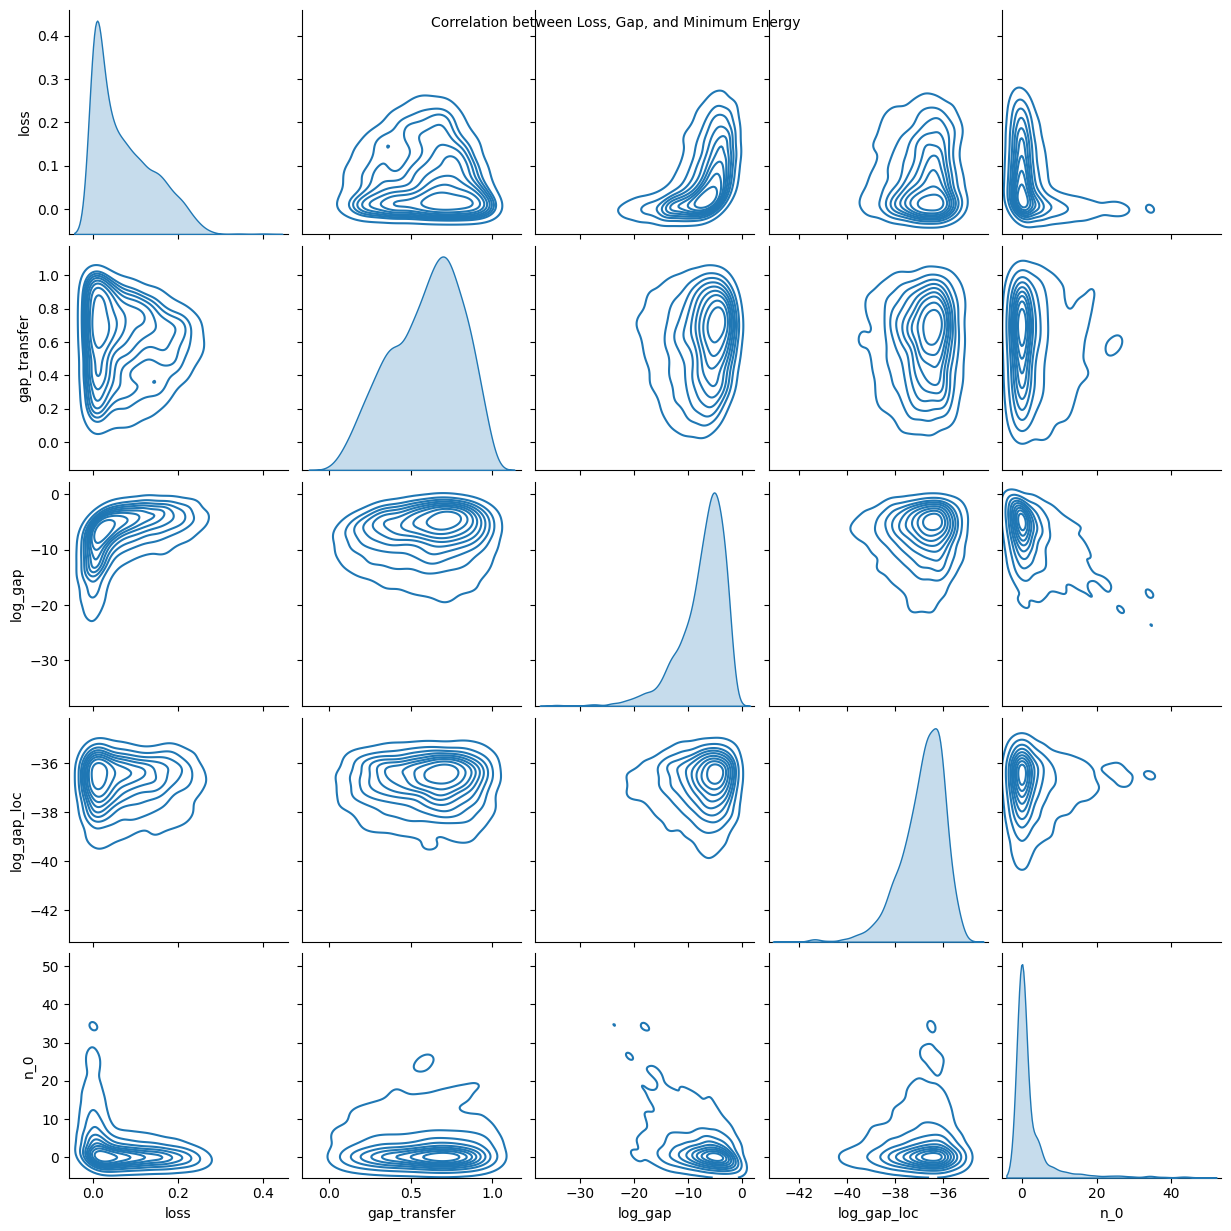

In [16]:
df = pd.DataFrame(res)
df['min_energy'] = df['E'].apply(lambda x: x[1])
df["log_gap"] = df.gap.apply(np.log)
df["log_gap_loc"] = df.gap_loc.apply(np.log)
df["log_loss"] = df.loss.apply(lambda x: np.log(x+0.0001))
# Create a pairplot to visualize the correlations between loss, gap, and minimum energy.
sns.pairplot(df[['loss', 'gap_transfer', "log_gap", "log_gap_loc", "n_0"]] , kind='kde')

# Set titles and labels.
plt.suptitle('Correlation between Loss, Gap, and Minimum Energy', size=10)
plt.show()

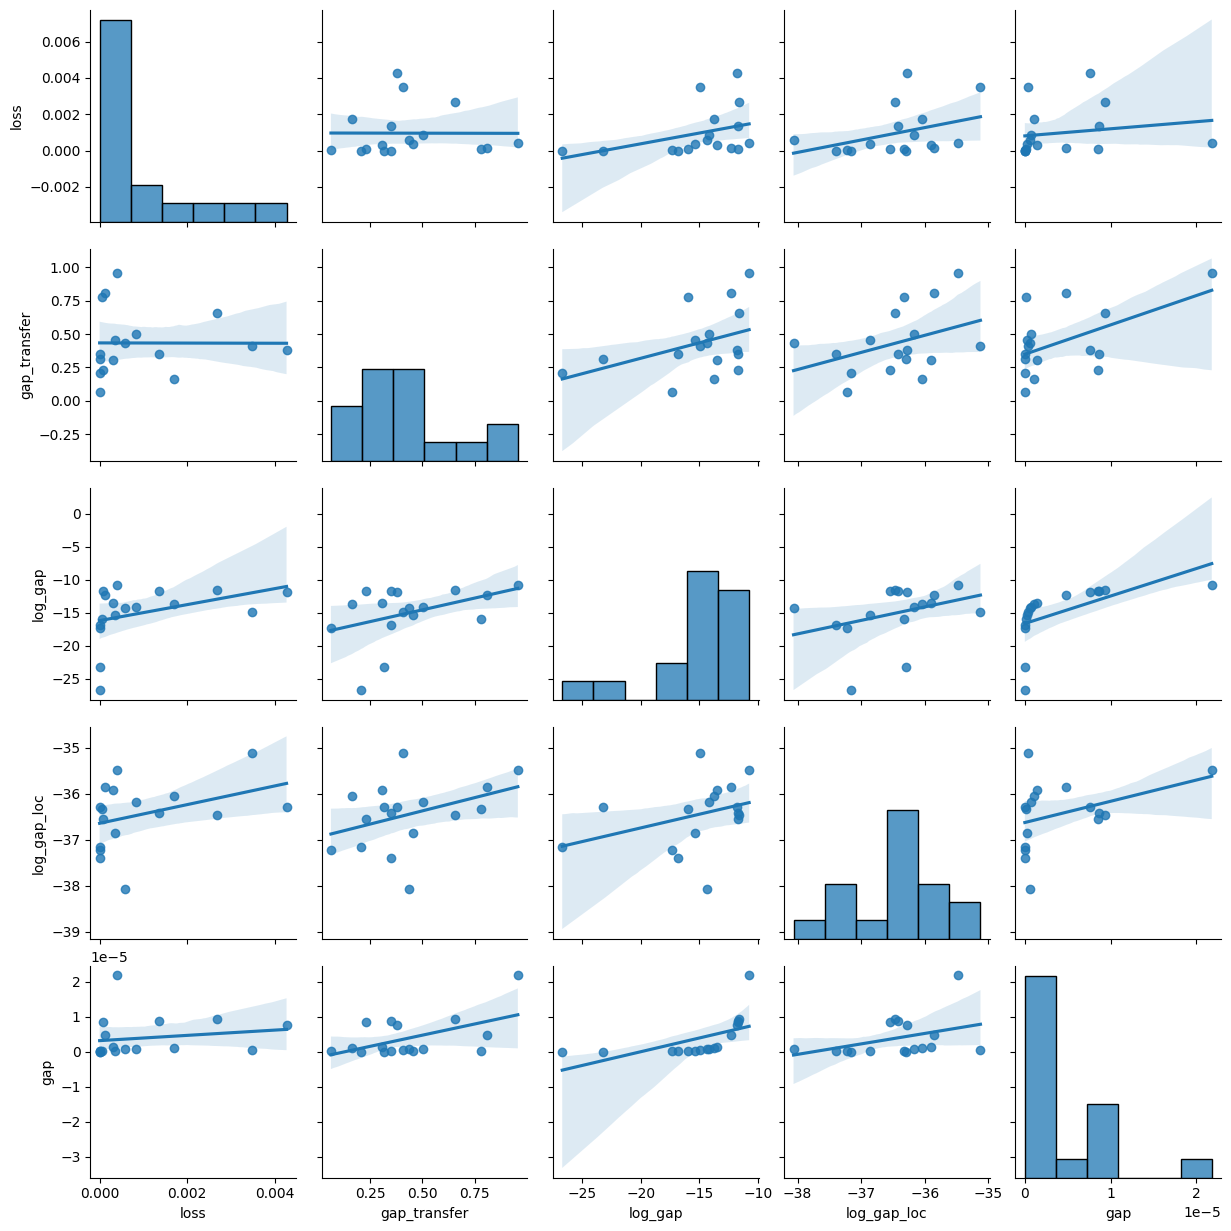

In [75]:
sns.pairplot(df[df.log_gap < -10][['loss', 'gap_transfer', "log_gap", "log_gap_loc", "gap"]] , kind='reg' , diag_kind="hist")

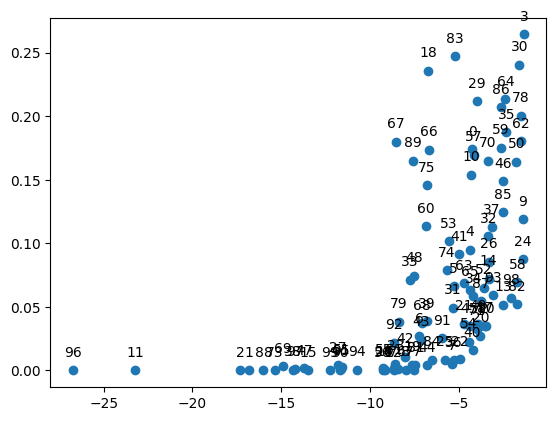

In [79]:
import matplotlib.pyplot as plt

plt.scatter(df['log_gap'], df['loss'])  # Plot each point
for i in range(len(df)):
    plt.annotate(df['seed'][i],  # This is the text to display
                 (df['log_gap'][i], df['loss'][i]),  # This is the point to which the text is annotated
                 textcoords="offset points",  # how to position the text
                 xytext=(0,10),  # distance from text to points (x,y)
                 ha='center')  # horizontal alignment can be left, right or center

plt.show()

In [88]:
sorted_df = df.sort_values(by='n_0')
sorted_df[["loss", "n_0", "gap"]][df.n_0 == 0]

/var/folders/z7/m5qzz0hj12z06hxsn5km2c400000gn/T/ipykernel_33872/2420113439.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sorted_df[["loss", "n_0", "gap"]][df.n_0 == 0]


,loss,n_0,gap
49,0.03667,0,0.019874
31,0.04916,0,0.004916
32,0.10566,0,0.035702
33,0.07125,0,0.000436
34,0.05830,0,0.015282
75,0.14551,0,0.001098
74,0.07876,0,0.003413
72,0.03498,0,0.022818
71,0.03286,0,0.018735
39,0.03873,0,0.001134


## AKLT

In [92]:
A = np.zeros((3, 2, 2))
A[0][1,0] = -1/np.sqrt(2)
A[2][0,1] = 1/np.sqrt(2)
A[1][0,0] = 1/2
A[1][1,1] = -1/2
A = get_canonical_form(A)
A_ = A.transpose(1,0,2)
A_tilde = np.einsum("ijk,ilm->jlkm", A_, A_).reshape(4,4)
sle = np.sort(np.linalg.eigvals(A_tilde))[::-1]

ValueError: middle index should represent physical index and the side indices should be virtual indices

### Remove high gapped data
tbd

# Canonical form

In [13]:
df

,seed,E,loss,gap,sle,min_energy,log_gap,sqrt_loss,log_loss
0,0,"[1.9438717679825833e-14, 0.014409947267734775,...",0.17387,1.440995e-02,0.463733,1.440995e-02,-4.239837,0.416977,-1.748872
1,1,"[-1.5771065317389434e-15, 3.8080840688647246e-...",0.00000,3.808084e-08,0.650810,3.808084e-08,-17.083555,0.000000,-9.210340
2,2,"[-7.138036391334365e-15, 3.0888942128807335e-0...",0.00002,3.088895e-08,0.936650,3.088894e-08,-17.292867,0.004472,-9.028019
3,3,"[-7.086522186275027e-16, 0.02242465732606774, ...",0.26422,2.242466e-02,0.268709,2.242466e-02,-3.797594,0.514023,-1.330595
4,4,"[-3.078436633873759e-15, 0.012584317829214485,...",0.09499,1.258432e-02,0.330738,1.258432e-02,-4.375304,0.308204,-2.352931
...,...,...,...,...,...,...,...,...,...
95,95,"[-1.5689591293503792e-17, 1.3095670926367155e-...",0.00135,1.309567e-06,0.648040,1.309567e-06,-13.545814,0.036742,-6.536192
96,96,"[-1.017163421314269e-15, 2.4734429547128766e-1...",0.00000,2.474460e-12,0.793034,2.473443e-12,-26.724999,0.000000,-9.210340
97,97,"[-1.0692467418360418e-15, 6.729505611033403e-0...",0.00083,6.729506e-07,0.496371,6.729506e-07,-14.211594,0.028810,-6.980326
98,98,"[-1.0489672406393248e-14, 0.12618235696312238,...",0.05733,1.261824e-01,0.353133,1.261824e-01,-2.070027,0.239437,-2.857188


## Calculate transfer matrix

In [8]:
# for seed in range(0, 11):
seed = 0
A = FF.block1D(bd, sps, bd, seed=seed)
A_ = A.transpose(1,0,2)
A_tilde_ = np.einsum("ijk,ilm->jlkm", A_, A_)
A_tilde = A_tilde_.reshape(4,4)
e, V = np.linalg.eigh(A_tilde)
rho = e[-1]
A_tilde = A_tilde / rho

e, V = np.linalg.eigh(A_tilde)
x = V[:,-1].reshape(2,2)

e, U = np.linalg.eigh(x)
x_h = U @ np.diag(np.sqrt(e + 0j)) @ U.T
x_h_inv = U @ np.diag(1/np.sqrt(e + 0j)) @ U.T

B = x_h_inv @ A_ @ x_h / np.sqrt(rho) #canonical form
B = B.transpose(1,0,2)


In [9]:
check_cano = np.einsum("jik, lik->jl",B, B)
print("is identity : ",  np.linalg.norm(np.eye(2) - check_cano))

is identity :  2.9373740229761033e-16


### Spectrum must be same for A and B

In [10]:
B_ = B.transpose(1,0,2)
B_tilde_ = np.einsum("ijk,ilm->jlkm", B_, B_).reshape(4,4)
Eb = np.linalg.eigvals(B_tilde_)
Ea = np.linalg.eigvals(A_tilde)
print(np.linalg.norm(Ea.real - Eb.real))
print(Eb[1].real)
print(Ea[1])

2.665835984225005e-16
0.46373257491552144
0.4637325749155212


### aggrigate all second largest eigenvalue and store into dataframe 

### Check both actually return same MPS

In [118]:
mps_nodes, mps_edges = FF.create_MPS(6, A)
for k in range(len(mps_edges)):
    C = tn.contract(mps_edges[k])
y1 = C.tensor.reshape(-1)
y1 /= np.linalg.norm(y1)

mps_nodes, mps_edges = FF.create_MPS(6, B)
for k in range(len(mps_edges)):
    C = tn.contract(mps_edges[k])
y2 = C.tensor.reshape(-1)
y2 /= np.linalg.norm(y2)
print("y1 - y2 : ", np.linalg.norm(y1-y2))

y1 - y2 :  8.987388080934195e-16


In [165]:
Ea, Eb

(array([1.        , 0.46373257, 0.1586023 , 0.12083966]),
 array([1.        +0.j, 0.46373257+0.j, 0.1586023 +0.j, 0.12083966+0.j]))

In [37]:
for key, val in res.items():
    print(f'loss: {val["loss"]}')
    print(f'gap : {val["gap"]}')
    print(f"et : {val['et']}")
    print(f"et2 : {val['et2']}")
    print("\n")

loss: 0.17387
gap : 0.014409947267715335
et : [1.07903285 1.41623274 4.14088113 8.92945925]
et2 : [ 1.16431189  2.00571517 17.14689655 79.73524257]


loss: 0.0
gap : 3.808084226575378e-08
et : [-3.52683104 -2.4892931   3.46655985  5.3265312 ]
et2 : [ 6.19658016 12.01703717 12.43853718 28.37193457]


loss: 2e-05
gap : 3.088894926684373e-08
et : [-1.80583275 -1.69885453  7.63632091  8.15280263]
et2 : [ 2.8861067   3.26103194 58.31339699 66.46819078]


loss: 0.26422
gap : 0.022424657326068447
et : [-3.0497284  -0.4825839   1.14272441  4.25264852]
et2 : [ 0.23288722  1.30581908  9.30084333 18.08501945]


loss: 0.09499
gap : 0.012584317829217564
et : [0.7080587  0.83183422 0.92752041 2.80439502]
et2 : [0.50134713 0.69194816 0.86029412 7.86463145]


loss: 0.06638
gap : 0.00510515577127765
et : [-1.50881426 -0.8815801   0.66147717  6.17440182]
et2 : [ 0.43755205  0.77718348  2.27652046 38.12323784]


loss: 0.027
gap : 0.00046814891419191395
et : [-5.25731758 -2.88693889  2.25853235 12.8175936